<a href="https://colab.research.google.com/github/oluwamayowaa/Air-Quality-Prediction-zindi-challenge/blob/main/AirQo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
# Importing python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import missingno as msno
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Loading the datasets

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

# Merging both datasets

data = pd.concat((train, test)).reset_index(drop = True)
data.drop(columns = ['pm2_5'])

train.head()

ID        date    device  site_latitude  site_longitude  \
0  ID_JBYXJEUZ8X  2020-03-18  ANQ16PZJ       0.353465       32.560322   
1  ID_PEJJNLBUPR  2019-10-13  AB6051M4       0.390741       32.582257   
2  ID_21L8UZQO1T  2019-12-21  A0WN66FH       0.285751       32.578325   
3  ID_GNW2G8J4T8  2020-02-20     aq_41      -1.244985       29.989236   
4  ID_4XOX2V6SK0  2019-04-17     aq_41      -1.244985       29.989236   

   humidity  temp_mean  SulphurDioxide_SO2_column_number_density  \
0  0.846844  22.038542                                 -0.000138   
1  0.874493  21.545833                                       NaN   
2  0.729340  23.568655                                       NaN   
3  0.919271  16.338542                                 -0.000111   
4  0.858365  16.602083                                 -0.000127   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      1.042629   
1                                           NaN   
2                                           NaN   
3                                      0.750228   
4                                      0.792634   

   SulphurDioxide_SO2_slant_column_number_density  ...  \
0                                       -0.000143  ...   
1                                             NaN  ...   
2                                             NaN  ...   
3                                       -0.000083  ...   
4                                       -0.000101  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             4181.792969               69589.453125              3181.793457   
1                     NaN                        NaN                      NaN   
2             4440.391113               67341.109375              3440.390869   
3                     NaN                        NaN                      NaN   
4             4842.057488               64347.788635              3842.057585   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.799846              0.278111   
1                        NaN                   NaN   
2                  62.496590              0.416631   
3                        NaN                   NaN   
4                   4.971117              0.277157   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                   76.618553                   9.970293   
1                         NaN                        NaN   
2                  -97.300758                  63.690605   
3                         NaN                        NaN   
4                   74.786025                  32.583070   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle      pm2_5  
0                 -93.110069                 19.214193  63.853333  
1                        NaN                       NaN  32.507083  
2                -127.856804                 40.857922  80.290833  
3                        NaN                       NaN  42.601687  
4                 -57.273638                 21.864529  89.642229  

[5 rows x 71 columns]

In [4]:
train.tail()

ID        date    device  site_latitude  site_longitude  \
9918  ID_E2O117AYG3  2020-07-20  APZ80RTM       0.306666       32.608550   
9919  ID_8CJG37XAYN  2020-02-23     aq_60       0.307780       32.651449   
9920  ID_NTRI2J528O  2020-04-17  AJCK5L86       0.343898       32.587226   
9921  ID_IBH41YUMOZ  2020-06-08     aq_76       0.357987       32.584100   
9922  ID_44EJBIBS7D  2019-10-30     aq_46       0.298750       32.615000   

      humidity  temp_mean  SulphurDioxide_SO2_column_number_density  \
9918  0.736872  22.965972                                       NaN   
9919  0.721721  26.555392                                 -0.000684   
9920  0.810413  22.915625                                       NaN   
9921  0.876437  21.258333                                       NaN   
9922  0.868209  22.238333                                       NaN   

      SulphurDioxide_SO2_column_number_density_amf  \
9918                                           NaN   
9919                                       0.41426   
9920                                           NaN   
9921                                           NaN   
9922                                           NaN   

      SulphurDioxide_SO2_slant_column_number_density  ...  \
9918                                             NaN  ...   
9919                                       -0.000283  ...   
9920                                             NaN  ...   
9921                                             NaN  ...   
9922                                             NaN  ...   

      Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
9918             7156.016834               48356.941077   
9919            13266.058594               20344.134766   
9920             7754.737305               44284.785156   
9921             6357.190430               53044.425781   
9922             5046.156250               62448.808594   

      Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
9918              6156.016834                   3.419584   
9919             12266.058594                  10.198909   
9920              6754.737305                   5.724823   
9921              5357.190430                  49.711514   
9922              4046.156494                  12.753333   

      Cloud_surface_albedo  Cloud_sensor_azimuth_angle  \
9918              0.235853                   72.847686   
9919              0.284046                  -97.272919   
9920              0.299491                  -98.203743   
9921              0.279414                   71.634727   
9922              0.295881                  -99.703812   

      Cloud_sensor_zenith_angle  Cloud_solar_azimuth_angle  \
9918                  50.858546                 -31.908548   
9919                  64.089607                -109.482361   
9920                  53.532288                 -70.173080   
9921                  61.877548                 -26.566027   
9922                  37.296741                -115.526276   

      Cloud_solar_zenith_angle      pm2_5  
9918                 24.023105  69.690417  
9919                 32.003708  47.470518  
9920                 32.261959  43.237917  
9921                 25.409733  25.599925  
9922                 34.218605  27.089820  

[5 rows x 71 columns]

In [5]:
print(f'The dataframe has {train.shape[0]} rows and {train.shape[1]} columns ')

The dataframe has 9923 rows and 71 columns 


In [6]:
train.describe()

site_latitude  site_longitude     humidity    temp_mean  \
count    9923.000000     9923.000000  9923.000000  9903.000000   
mean        0.242512       32.472012     0.790819    21.571340   
std         0.332311        0.545655     0.157910     4.060502   
min        -1.244985       29.989236     0.000000     0.000000   
25%         0.289040       32.553714     0.770865    21.233081   
50%         0.315446       32.589580     0.822951    22.271875   
75%         0.354700       32.617600     0.869333    23.314268   
max         0.391478       32.752570     1.000000    29.735000   

       SulphurDioxide_SO2_column_number_density  \
count                               4291.000000   
mean                                   0.000025   
std                                    0.000299   
min                                   -0.000996   
25%                                   -0.000149   
50%                                    0.000010   
75%                                    0.000182   
max                                    0.001880   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                   4291.000000   
mean                                       0.791470   
std                                        0.197640   
min                                        0.345894   
25%                                        0.659173   
50%                                        0.785107   
75%                                        0.906811   
max                                        1.633184   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                     4291.000000   
mean                                         0.000014   
std                                          0.000207   
min                                         -0.000671   
25%                                         -0.000117   
50%                                          0.000009   
75%                                          0.000139   
max                                          0.002445   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    4291.000000                          4291.000000   
mean                        0.146898                           -17.585282   
std                         0.085867                            86.751706   
min                         0.000000                          -105.713519   
25%                         0.084368                           -99.640536   
50%                         0.148113                           -97.301544   
75%                         0.216913                            73.653023   
max                         0.299840                            84.742798   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                         4291.000000  ...             8414.000000   
mean                            37.885657  ...             6334.871458   
std                             19.323026  ...             3172.279161   
min                              0.100934  ...             1150.149929   
25%                             22.521445  ...             3948.409668   
50%                             42.489365  ...             5768.341064   
75%                             55.985201  ...             8665.129820   
max                             66.024800  ...            15000.000287   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count                8414.000000              8414.000000   
mean                56017.987582              5405.379477   
std                 19694.711846              3073.159743   
min                 15003.535156              1150.149929   
25%                 39480.238281              2952.133894   
50%                 57283.976562              4768.781361   
75%                 71602.269531              7665.129820   
max                 88513.484375             14000.000268   

       Cloud_cloud_optical_dept

In [7]:
train.columns

Index(['ID', 'date', 'device', 'site_latitude', 'site_longitude', 'humidity',
       'temp_mean', 'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        9923 non-null   object 
 1   date                                                      9923 non-null   object 
 2   device                                                    9923 non-null   object 
 3   site_latitude                                             9923 non-null   float64
 4   site_longitude                                            9923 non-null   float64
 5   humidity                                                  9923 non-null   float64
 6   temp_mean                                                 9903 non-null   float64
 7   SulphurDioxide_SO2_column_number_density                  4291 non-null   float64
 8   SulphurDioxide_SO2

# Inspecting the target distribution

In [9]:
px.histogram(train, x = 'pm2_5')

The target variable skews left.

In [10]:
print('Skewness: ', train['pm2_5'].skew())

Skewness:  1.4444433906353067


## Exploratory Data Analysis

There are a lot of features, so we would build a correlation heatmap to find features that are dependent on the target variable.

In [11]:
import math
correlation = train.corr().round(3)

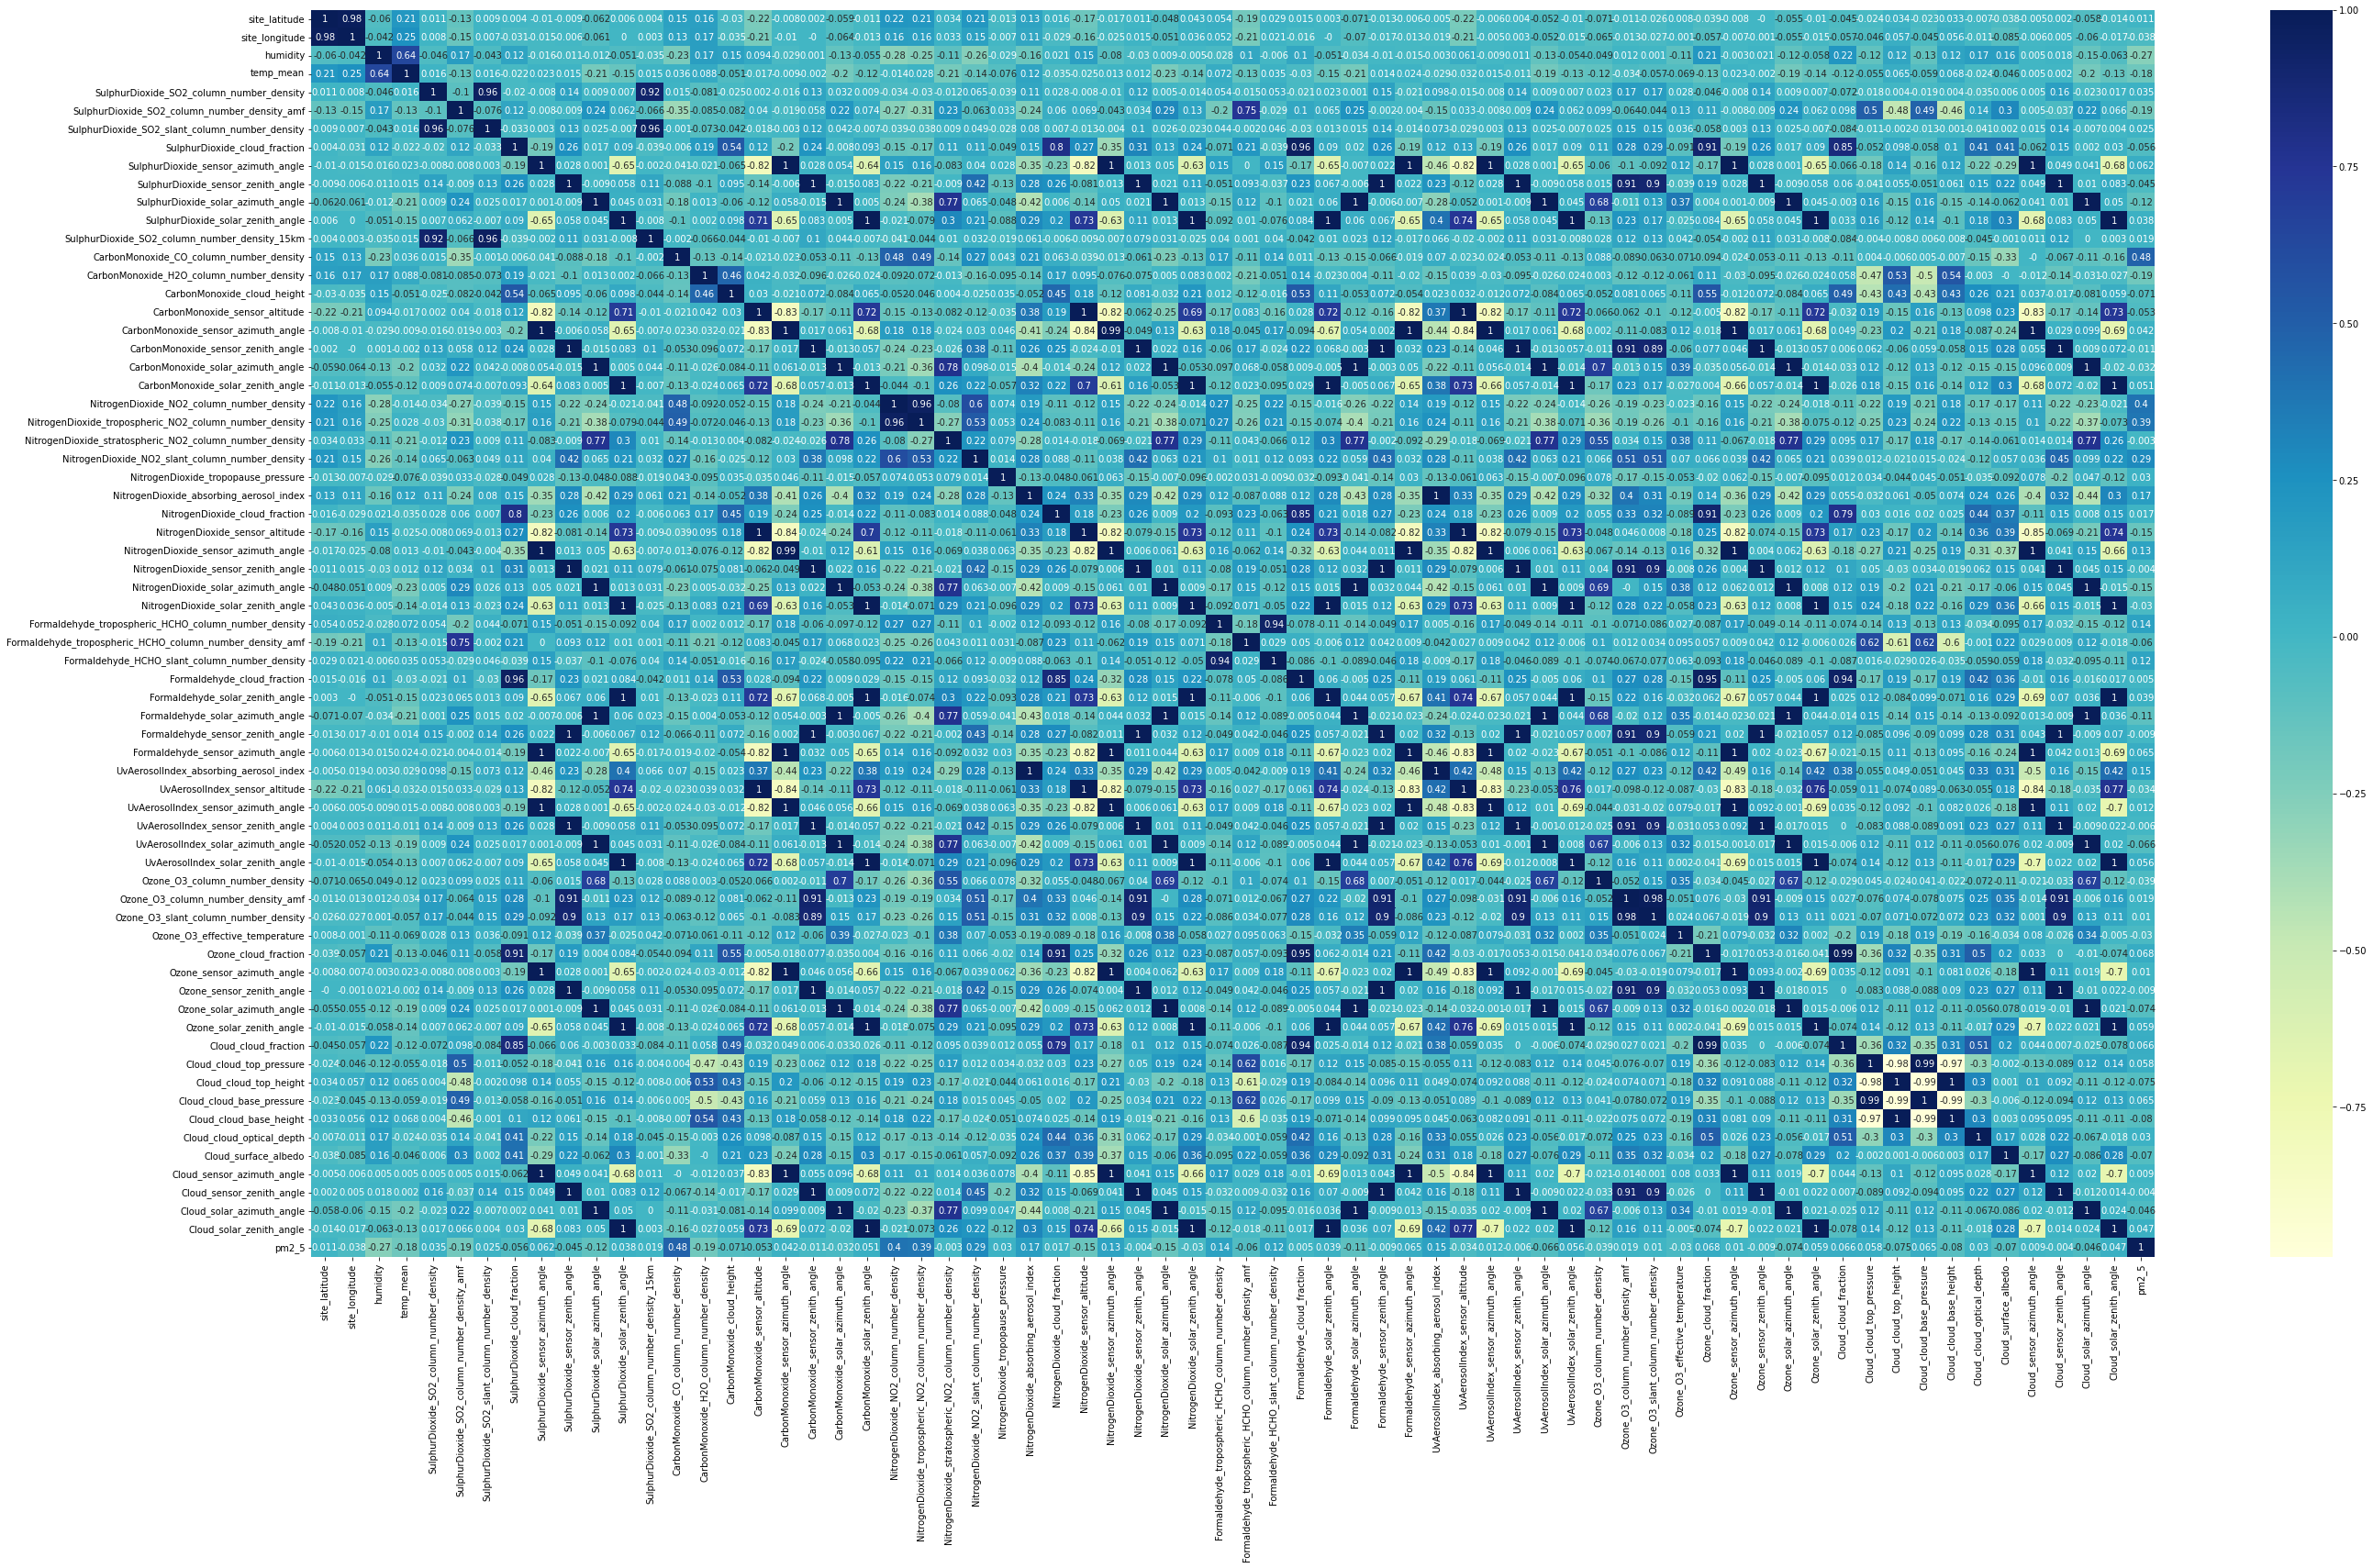

In [12]:
plt.subplots(figsize = (45, 25))
sns.heatmap(correlation, cmap = 'YlGnBu', annot = True)

In [13]:
drop_angles = [i for i in train.columns.to_list() if 'angle' in i and 'SulphurDioxide' not in i]
drop_fraction = [i for i in train.columns.to_list() if 'fraction' in i and 'Sulphur' not in i]
drop = drop_angles + drop_fraction

In [14]:
others = ['SulphurDioxide_SO2_slant_column_number_density',
             'SulphurDioxide_SO2_column_number_density_15km',
             'UvAerosolIndex_absorbing_aerosol_index',
            'Cloud_cloud_top_pressure',
            'Cloud_cloud_top_height',
            'NitrogenDioxide_sensor_altitude',
            'UvAerosolIndex_sensor_altitude',
            'NitrogenDioxide_tropospheric_NO2_column_number_density',
            'Ozone_O3_column_number_density',
            'Ozone_O3_column_number_density_amf',
            'Cloud_cloud_base_height']

cols = drop + others

In [15]:
new_train = train.drop(columns = cols)

In [16]:
def bearing(lat, long):
    earth_radius = 6370
    rad = np.radians(lat - long)
    lat, long = map(np.radians, (lat, long))
    y = np.sin(rad) * np.cos(lat)
    x = np.cos(lat) * np.sin(lat) - np.sin(long) * np.cos(long) * np.cos(rad)
    return np.degrees(np.arctan2(y, x))

def distance(lat, long):
    a = np.abs(lat - long)
    return a

In [17]:
new_train['bearing'] = bearing(train['site_latitude'], train['site_longitude'])
new_train['distance'] = distance(train['site_latitude'], train['site_longitude'])

In [18]:
new_train = new_train.drop(columns = ['ID', 'date', 'site_latitude', 'site_longitude'])

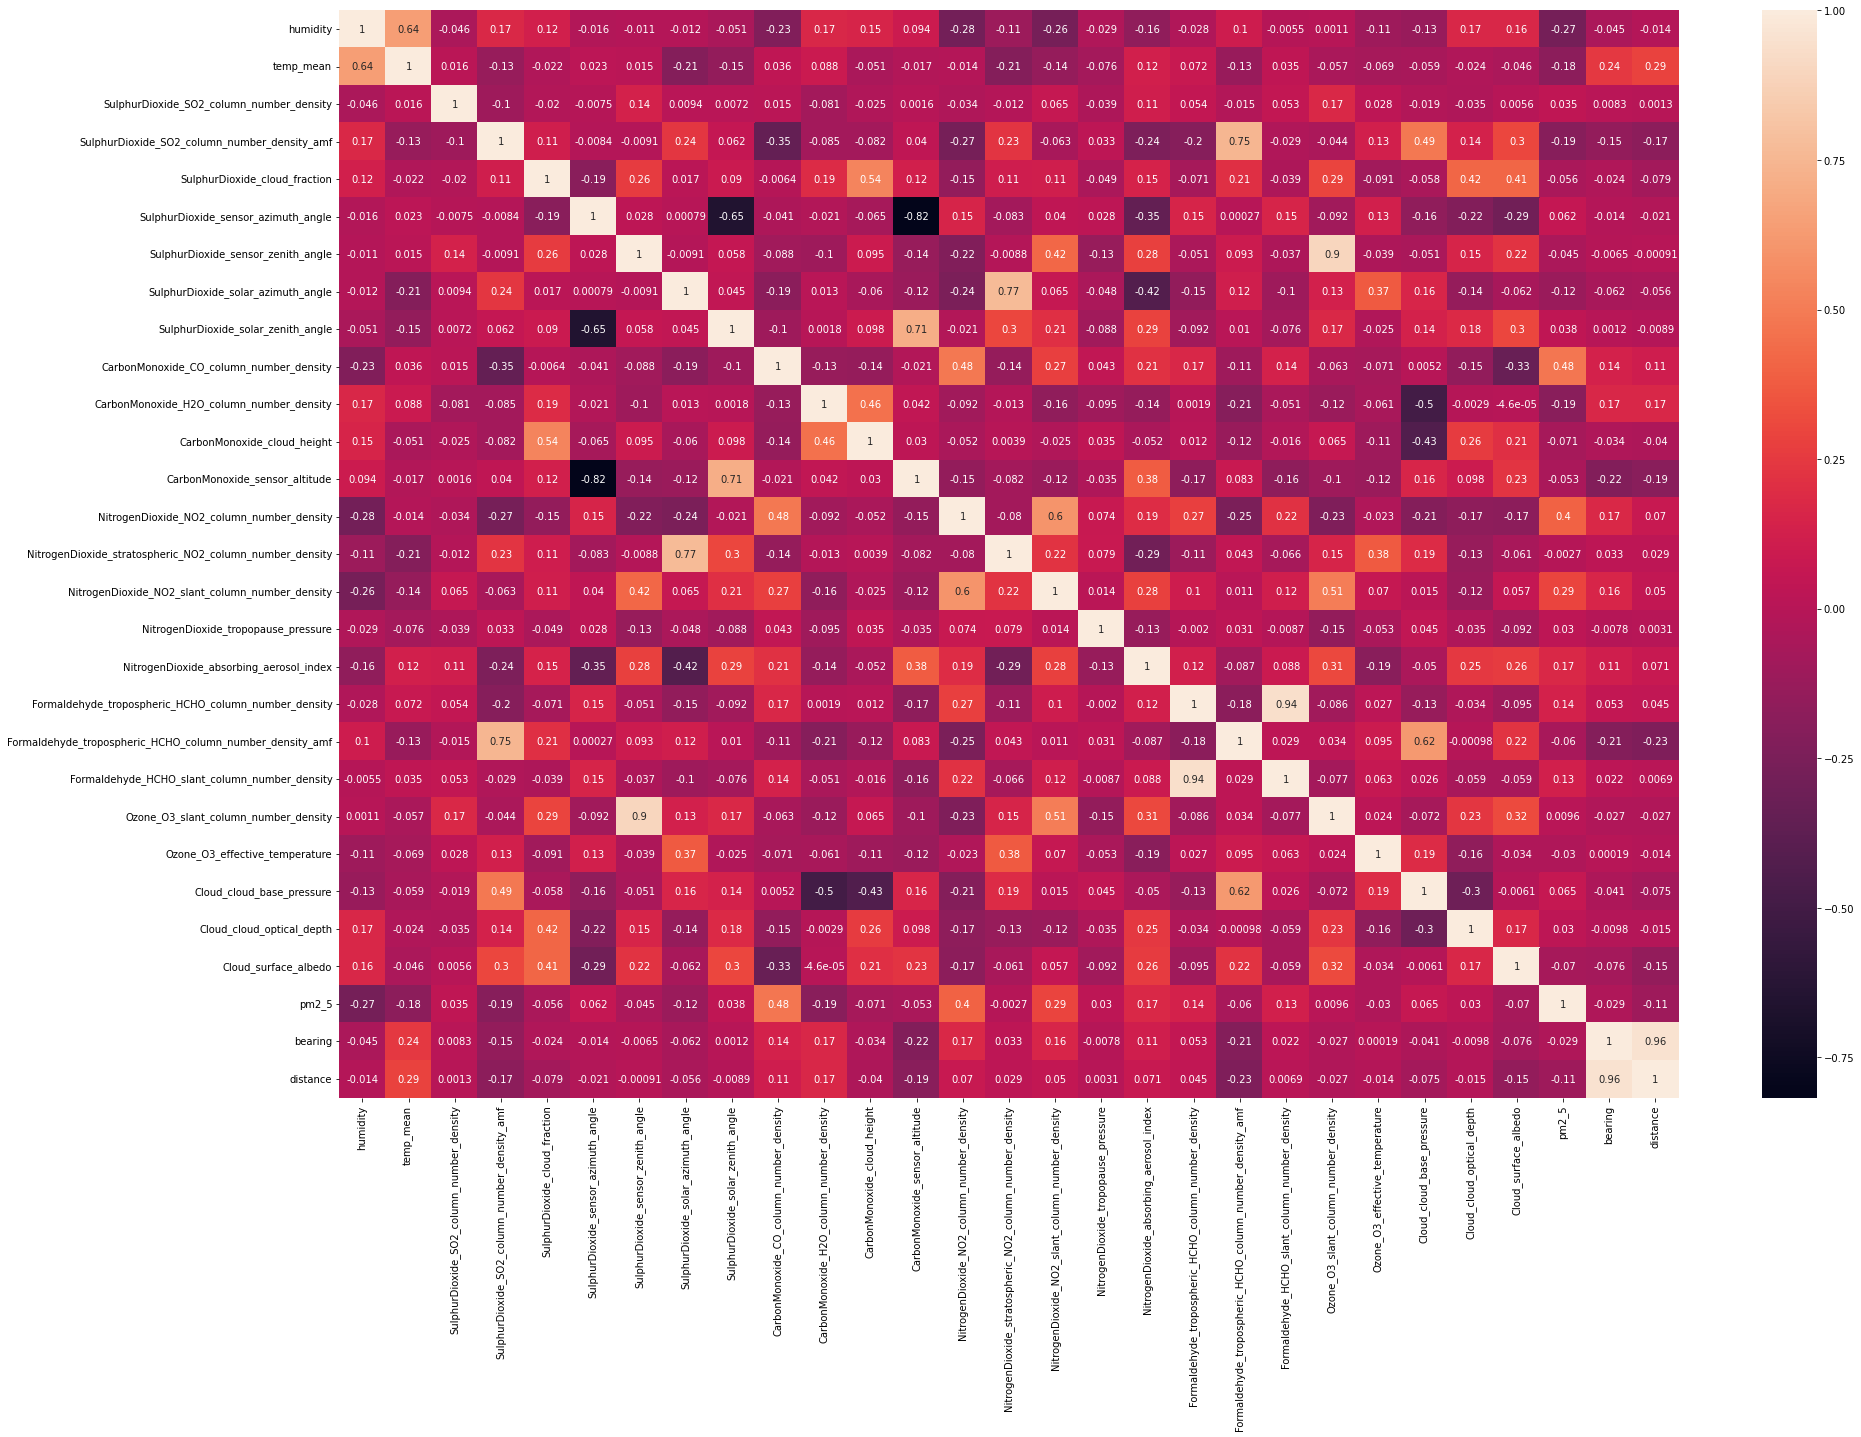

In [19]:
plt.subplots(figsize = (30, 20))
sns.heatmap(new_train.corr(), annot= True)

## Checking for duplicates

In [20]:
# Checking for duplicate samples
new_train.duplicated().sum()

0

There are no duplicate values in the train and test sets each

## Checking for missing values

In [21]:
new_train.isna().any()

device                                                      False
humidity                                                    False
temp_mean                                                    True
SulphurDioxide_SO2_column_number_density                     True
SulphurDioxide_SO2_column_number_density_amf                 True
SulphurDioxide_cloud_fraction                                True
SulphurDioxide_sensor_azimuth_angle                          True
SulphurDioxide_sensor_zenith_angle                           True
SulphurDioxide_solar_azimuth_angle                           True
SulphurDioxide_solar_zenith_angle                            True
CarbonMonoxide_CO_column_number_density                      True
CarbonMonoxide_H2O_column_number_density                     True
CarbonMonoxide_cloud_height                                  True
CarbonMonoxide_sensor_altitude                               True
NitrogenDioxide_NO2_column_number_density                    True
NitrogenDi

Since all the columns with missing values are numeric, I am going to replace missing values with the median

In [22]:
median_imputer = SimpleImputer(strategy = 'median')
def impute_missing (df):
    for i in df.columns:
        if df[i].dtype != 'object':
            df[i] = median_imputer.fit_transform(df[i].values.reshape(-1, 1))
    return df

In [23]:
train_df = impute_missing(new_train)
#test_df = impute_missing(test_df)

From the previous chart, we saw that the target variable pm2_5 was skewed to the left. I would apply a log to remove skewness

In [24]:
log_y = np.log(train_df['pm2_5'])
px.histogram(log_y)

It seems converting the target variable values to logarithmic features has made it somewhat normally distributed.

In [25]:
train_df['pm2_5'] = train['pm2_5']

In [26]:
le = LabelEncoder()
train_df['device'] = le.fit_transform(train_df['device'])

In [27]:
features = train_df.drop(columns = ['pm2_5'])
y = train_df['pm2_5']

## Scaling features

In [28]:
features.shape

(9923, 29)

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

## Splitting into train and validation sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 40)

## Data Modeling

In [32]:
xgboost = XGBRegressor(n_estimators = 9000,
                       learning_rate = 0.01,
                       max_depth = 8,
                     objective = 'reg:squarederror',
                    random_state = 5  )

In [43]:
lgbm = LGBMRegressor(
   n_estimators =9000,
   learning_rate = 0.1,
   max_bin = 2000,
   num_leaves = 4
)

In [50]:
catboost = CatBoostRegressor(
    learning_rate = 0.1,
    loss_function = 'MAE',
    depth = 8,
    verbose =  False
)

#### XGBOOST

In [37]:
xgboost.fit(X_train, y_train)

XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=9000,
             objective='reg:squarederror', random_state=5)

In [38]:
preds = xgboost.predict(X_test)

In [39]:
print(mean_absolute_error(y_test, preds))

10.041876778325943


#### LightGBM

In [44]:
lgbm.fit(X_train, y_train)

LGBMRegressor(max_bin=2000, n_estimators=9000, num_leaves=4)

In [45]:
preds = lgbm.predict(X_test)

In [46]:
print(mean_absolute_error(y_test, preds))

10.912940839190467


#### CATBOOST

In [51]:
catboost.fit(X_train, y_train)

In [52]:
cat_preds = catboost.predict(X_test)

In [53]:
print(mean_absolute_error(y_test, preds))

10.912940839190467


### Blending

In [54]:
meta_preds = list()
base_models = (lgbm, catboost)
for model in base_models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    yhat = yhat.reshape(len(yhat), 1)
    meta_preds.append(yhat)

In [55]:
meta_preds = np.hstack(meta_preds)

In [56]:
blender = xgboost
blender.fit(meta_preds, y_test)

XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=9000,
             objective='reg:squarederror', random_state=5)

In [58]:
meta_X = list()

for i in base_models:
    pred = i.predict(X_test)
    pred = pred.reshape(len(pred), 1)

    meta_X.append(pred)

meta_X = np.hstack(meta_X)

blended_preds = blender.predict(meta_X)

In [64]:
mean_absolute_error(blended_preds, y_test)

1.3479283466605745

Fitting all models with the entire test data

In [65]:
xgboost.fit(X, y)
lgbm.fit(X, y)
catboost.fit(X, y)

In [66]:
vr = VotingRegressor(estimators=[('xgb', xgboost), ('lgb', lgbm), ('cat_boost', catboost)])
vr = vr.fit(X, y)

## Test Data

In [67]:
test.shape

(4254, 70)

In [68]:
test.tail()

ID        date    device  site_latitude  site_longitude  \
4249  ID_NYKGOYFBKZ  2020-08-25     aq_76       0.357987       32.584100   
4250  ID_IWO4EVLHSQ  2020-08-21  AB6051M4       0.390741       32.582257   
4251  ID_G1M1IMY9WU  2020-11-07  AB6051M4       0.390741       32.582257   
4252  ID_DXV65Q1QXI  2020-09-10     aq_61       0.373078       32.628226   
4253  ID_RY4ONQKO9E  2020-10-03     aq_30       0.059604       32.460320   

      humidity  temp_mean  SulphurDioxide_SO2_column_number_density  \
4249  0.786575  23.790833                                       NaN   
4250  0.828441  21.801389                                       NaN   
4251  0.859490  21.851042                                       NaN   
4252  0.833803  21.948864                                       NaN   
4253  0.783191  22.004514                                  0.000073   

      SulphurDioxide_SO2_column_number_density_amf  \
4249                                           NaN   
4250                                           NaN   
4251                                           NaN   
4252                                           NaN   
4253                                      0.745486   

      SulphurDioxide_SO2_slant_column_number_density  ...  \
4249                                             NaN  ...   
4250                                             NaN  ...   
4251                                             NaN  ...   
4252                                             NaN  ...   
4253                                        0.000054  ...   

      Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
4249              52109.843750             5625.392090   
4250              29895.648437             9842.744141   
4251              31481.298828             9398.727539   
4252              82490.293714             1776.181599   
4253              31672.103516             9357.613281   

      Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
4249               59100.105469              4625.392090   
4250               34098.406250              8842.744141   
4251               36332.582031              8398.727539   
4252               85711.453792              1441.561424   
4253               36565.695312              8357.613281   

      Cloud_cloud_optical_depth  Cloud_surface_albedo  \
4249                  11.611624              0.235978   
4250                   7.293560              0.285149   
4251                   4.397998              0.292733   
4252                   5.902633              0.216981   
4253                   3.968154              0.156763   

      Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
4249                   76.397339                  12.520192   
4250                   72.767441                  51.517994   
4251                 -101.590965                  15.151692   
4252                   76.433538                  12.068682   
4253                   72.122749                  58.131035   

      Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
4249                 -62.776257                 22.760517  
4250                 -49.859035                 18.032558  
4251                -122.484474                 32.596294  
4252                 -78.491224                 22.234252  
4253                -105.278580                 16.462521  

[5 rows x 70 columns]

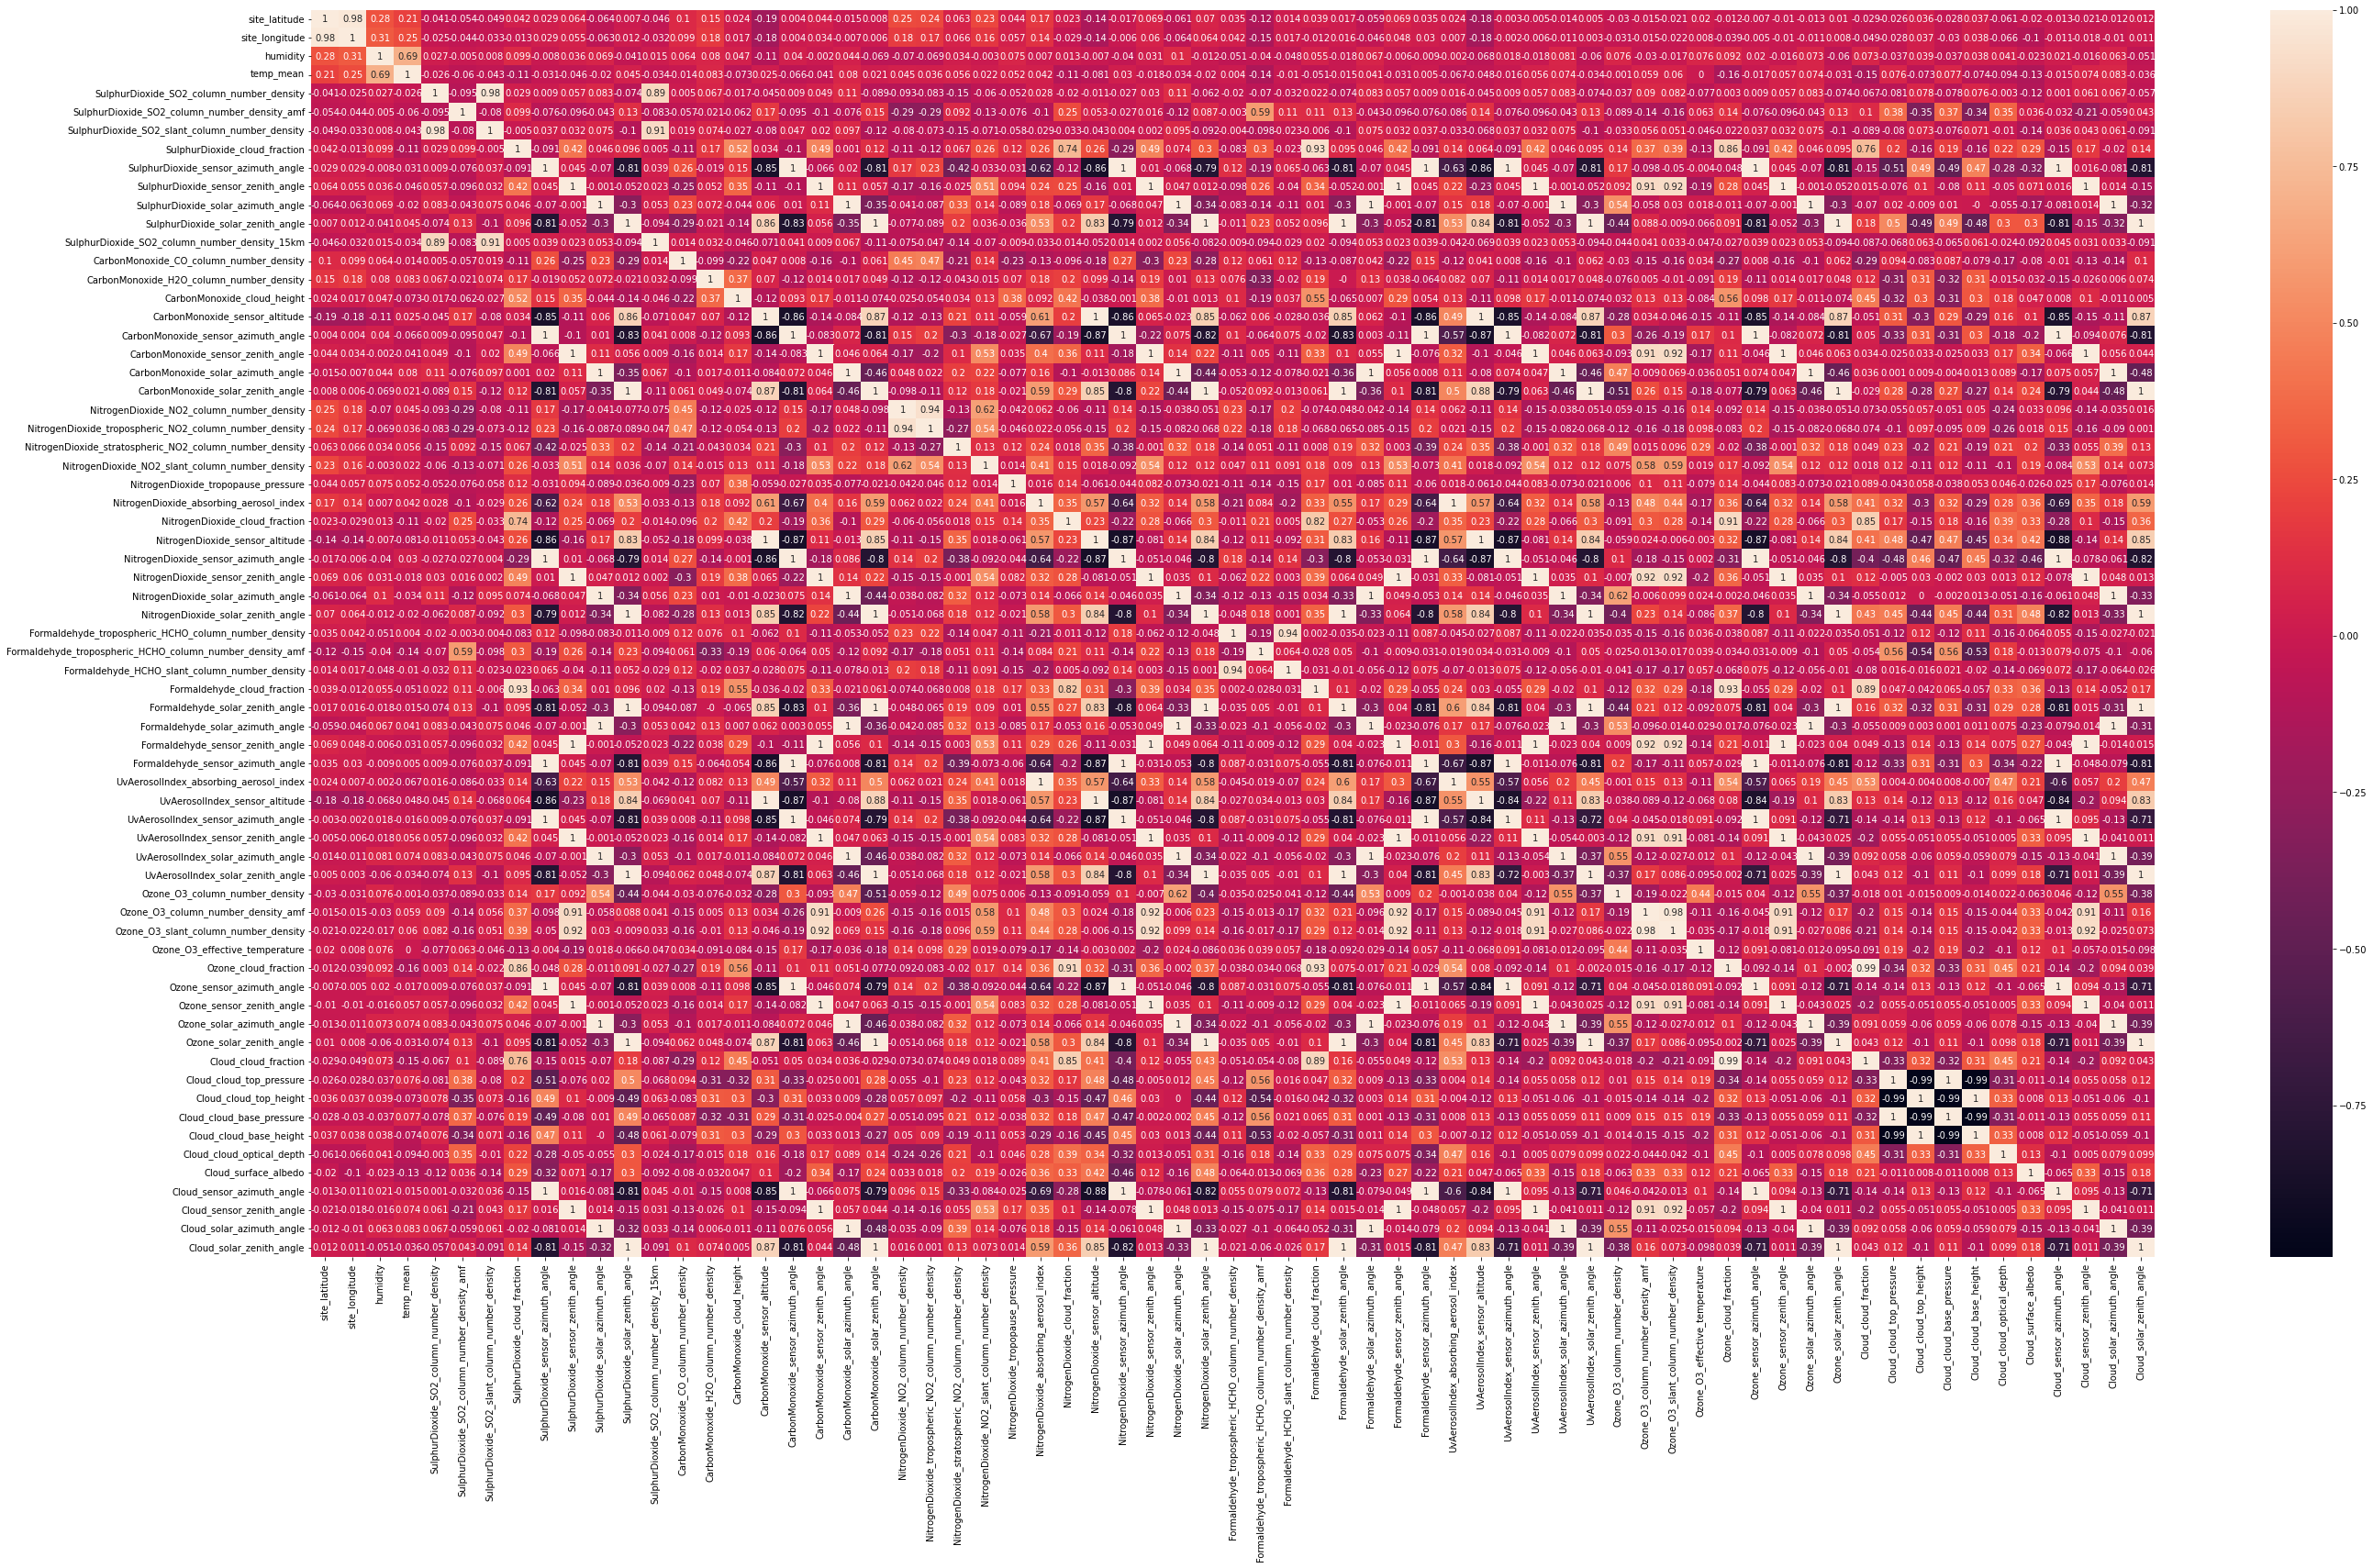

In [70]:
plt.subplots(figsize = (45, 25))
sns.heatmap(test.corr().round(3), annot = True)

In [71]:
new_test = test.drop(columns = cols)

In [72]:
new_test['bearing'] = bearing(test['site_latitude'], test['site_longitude'])
new_test['distance'] = distance(test['site_latitude'], test['site_longitude'])

In [74]:
new_test.isna().sum()

ID                                                             0
date                                                           0
device                                                         0
site_latitude                                                  0
site_longitude                                                 0
humidity                                                       0
temp_mean                                                      0
SulphurDioxide_SO2_column_number_density                    3340
SulphurDioxide_SO2_column_number_density_amf                3340
SulphurDioxide_cloud_fraction                               3340
SulphurDioxide_sensor_azimuth_angle                         3340
SulphurDioxide_sensor_zenith_angle                          3340
SulphurDioxide_solar_azimuth_angle                          3340
SulphurDioxide_solar_zenith_angle                           3340
CarbonMonoxide_CO_column_number_density                     2152
CarbonMonoxide_H2O_column

Filling missing values in the test set

In [76]:
test_df = impute_missing(new_test)
test_df = test_df.drop(columns = ['ID', 'date', 'site_latitude', 'site_longitude'])

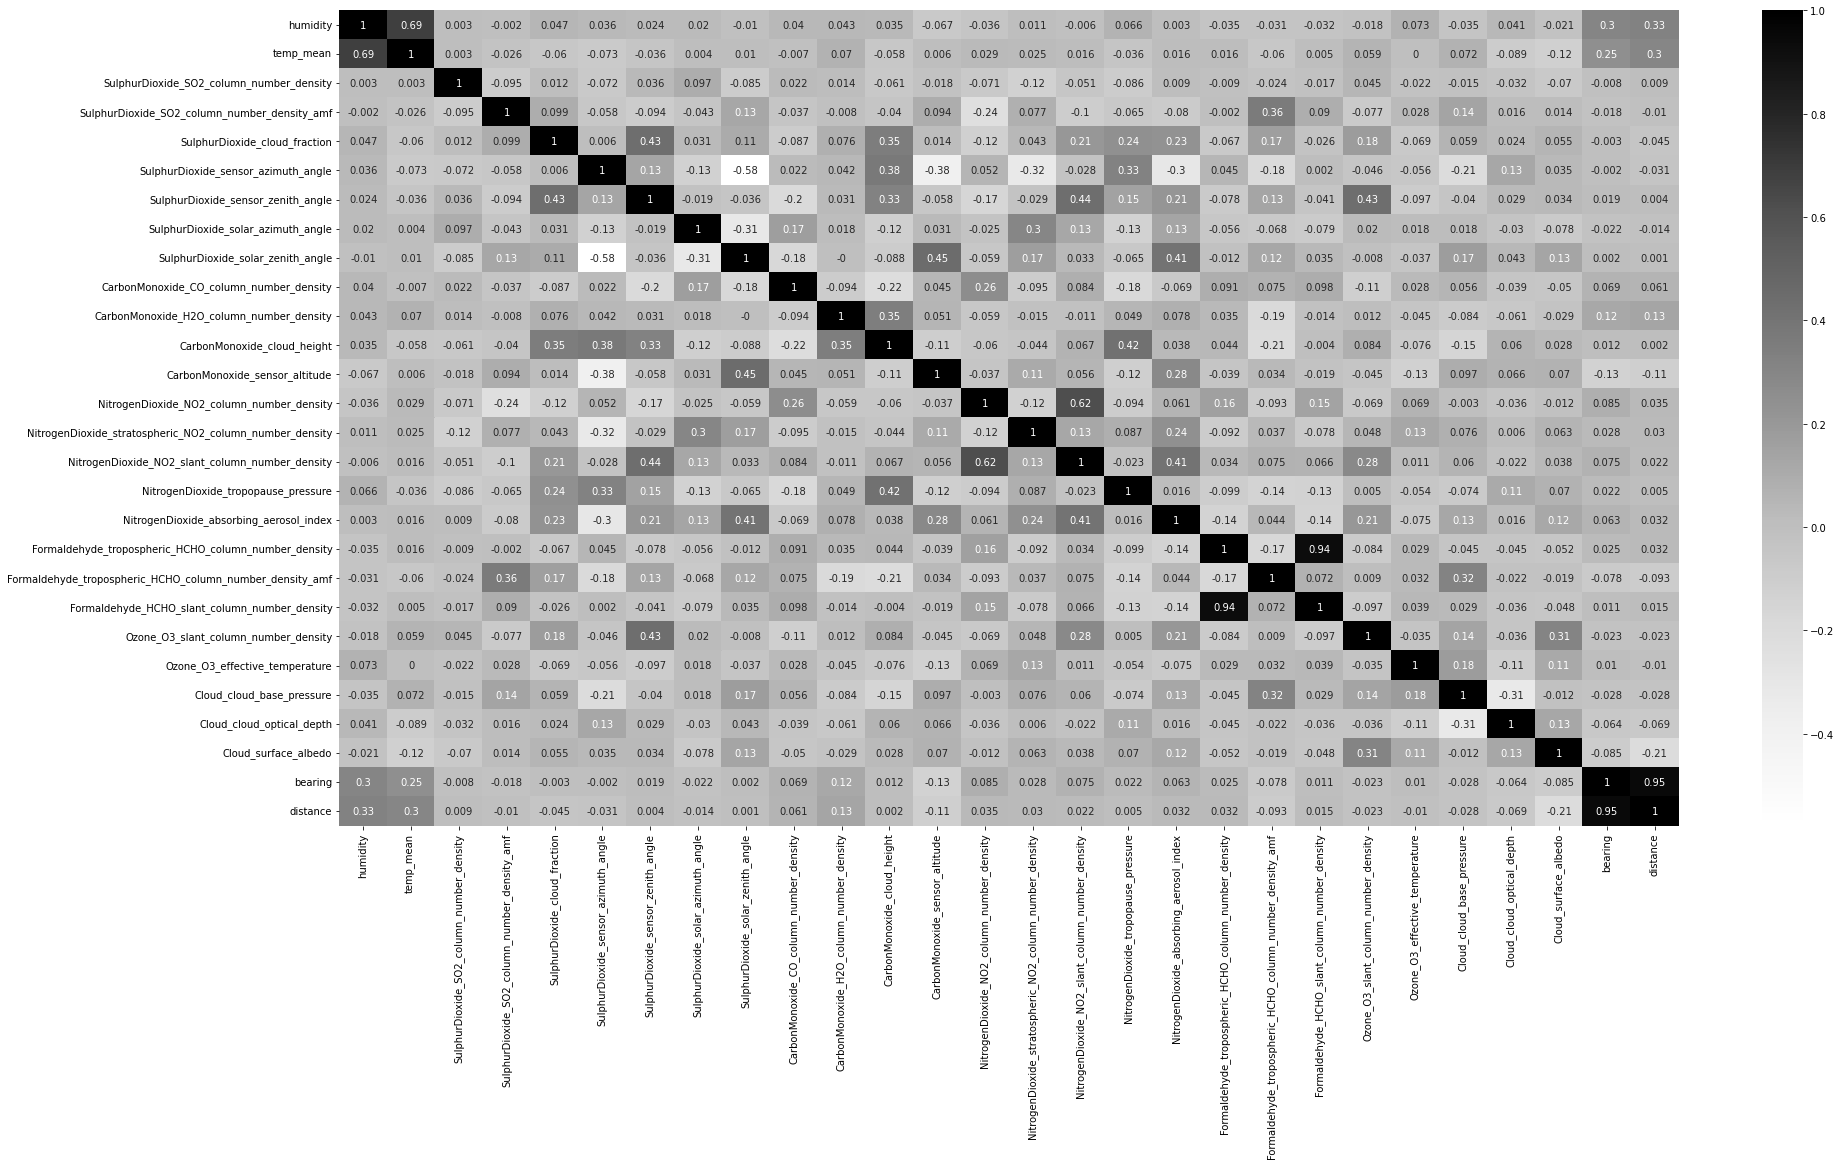

In [77]:
plt.subplots(figsize = (30, 15))
sns.heatmap(test_df.corr().round(3), annot = True, cmap = 'Greys')

Label encode the device column in the test dataframe

In [78]:
test_df['device'] = le.fit_transform(test_df['device'])

In [79]:
x_test = scaler.transform(test_df)

### Predicting pm2_5 values from the test data

In [80]:
test_preds = vr.predict(x_test)

### Creating submission file

In [81]:
submission = pd.DataFrame({'ID' : test.ID, 'pm2_5' : test_preds})
submission.head(4)

ID      pm2_5
0  ID_UOH62J0XHX  43.443577
1  ID_4OPWSB0UHJ  89.674778
2  ID_3SLMNNG1Z3  53.072893
3  ID_MFUHTXYPM4  83.196843

In [82]:
submission.to_csv('submission.csv', index= False)